In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [6]:
adress = 'D:/cs/master/machinelearning/presention/pca/data'
x=[]
y = []
target=[]
dim=(50,50)
for file in tqdm(os.listdir(adress)):
    image = cv2.imread(adress+'/'+file,0)
    resized_img = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    new=resized_img.ravel().tolist()
    x.append(new)
    y.append(file)
    target.append(file[0])


100%|███████████████████████████████████████████████████████████████████████████████| 192/192 [00:00<00:00, 200.17it/s]


In [7]:
#encode categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
target=labelencoder_X.fit_transform(target)

In [8]:
# split into a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.1,random_state=0)

In [9]:
# Compute a PCA 
from sklearn.decomposition import PCA
n_components = 50
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier().fit(X_train_pca, y_train)

Fitting the classifier to the training set


C:\Users\sayeh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))

C:\Users\sayeh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.00      0.00      0.00         1
           2       0.60      1.00      0.75         3
           3       1.00      0.75      0.86         4
           4       0.75      0.43      0.55         7
           5       0.67      1.00      0.80         2

    accuracy                           0.65        20
   macro avg       0.57      0.64      0.58        20
weighted avg       0.68      0.65      0.63        20



In [25]:
y_pred

array([3, 1, 4, 3, 3, 2, 2, 1, 5, 0, 1, 5, 2, 5, 4, 0, 1, 2, 4, 3],
      dtype=int64)

In [26]:
y_test

array([3, 2, 4, 3, 3, 2, 0, 4, 4, 0, 0, 4, 4, 5, 4, 5, 1, 2, 4, 3],
      dtype=int64)

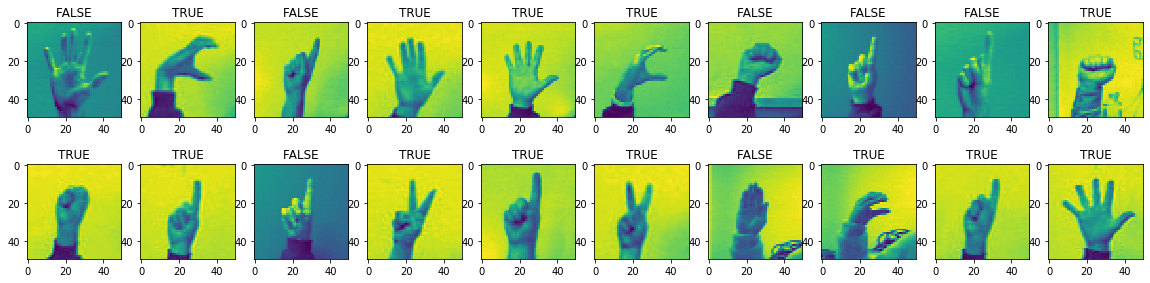

In [12]:
plt.figure(figsize=(20,10))
image=[]
i=0
for img  in range (len(X_test)):
    plt.subplot(4, 10, i+1 )
    x = np.reshape(X_test[i], (50, 50))
    plt.imshow(x)
    if y_pred[i]==y_test[i]:
        plt.title("TRUE")
    else:    
        plt.title("FALSE")
    i+=1
    